In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
# sys.path.insert(0, 'E:/MyRepositories/JobProjects/Аналитика_базы_данных/functions/')
sys.path.insert(0, '../functions/')
from out_dataframe import MyFrame

In [27]:
import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [28]:
product = "водяной насос"  # изделие по которому будут строится графики
client = 'ЯМЗ'  # потребитель

In [29]:
# создаем датафреймы по годам
client_asp = f"{client} - АСП"   # потребитель АСП
client_gp = f"{client} - эксплуатация"  # потребитель ГП

# df1 = MyFrame(2022, client_asp, product).get_frame()
df2 = MyFrame(2022, client_gp, product).get_frame()
# df3 = MyFrame(2023, client_asp, product).get_frame()
df4 = MyFrame(2023, client_gp, product).get_frame()
# df5 = MyFrame(2024, client_asp, product).get_frame()
df6 = MyFrame(2024, client_gp, product).get_frame()
# df7 = MyFrame(2025, client_asp, product).get_frame()
df8 = MyFrame(2025, client_gp, product).get_frame()

In [30]:
# создаем сводный датафрейм из датафреймов по годам
# df = pd.concat([df6, df8])
df = pd.concat([df2, df4, df6, df8])
# df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 28 to 1202
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Месяц регистрации                            2087 non-null   object
 1   Обозначение изделия                          2087 non-null   object
 2   Дата изготовления изделия                    1937 non-null   object
 3   Транспортное средство (установка)            1458 non-null   object
 4   Пробег, наработка                            2087 non-null   int32 
 5   Причины возникновения дефектов               1918 non-null   object
 6   Пояснения к причинам возникновения дефектов  1645 non-null   object
 7   Поставщик дефектного комплектующего          1839 non-null   object
dtypes: int32(1), object(7)
memory usage: 138.6+ KB


In [32]:
df['Обозначение изделия'] = df['Обозначение изделия'].replace({'245-1307010-А1-11       (факт 240-1307010-А1)': '240-1307010-А1'})

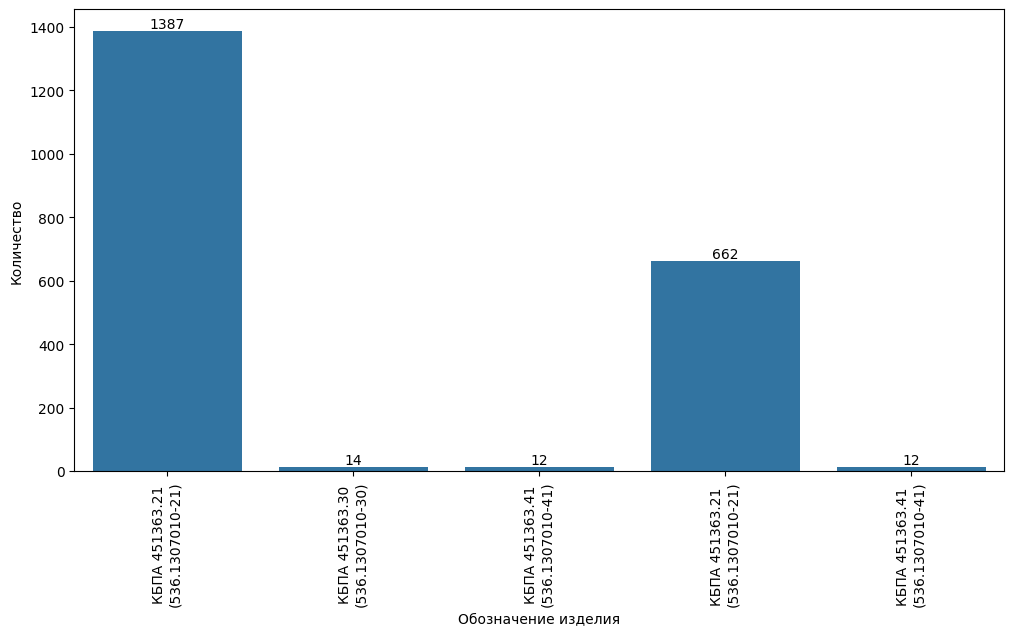

In [33]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Обозначение изделия')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylabel("Количество")
plt.xticks(rotation=90);

# Сохранение графика в файл
plt.savefig(f'Графики/{client}_{product}_по виду изделия.png')

In [34]:
df = df.sort_values(by='Месяц регистрации')
# df['Месяц регистрации'] = df['Месяц регистрации'].dt.strftime('%Y-%m')
df['Месяц регистрации'] = pd.to_datetime(df['Месяц регистрации'], errors='coerce').dt.strftime('%Y-%m')

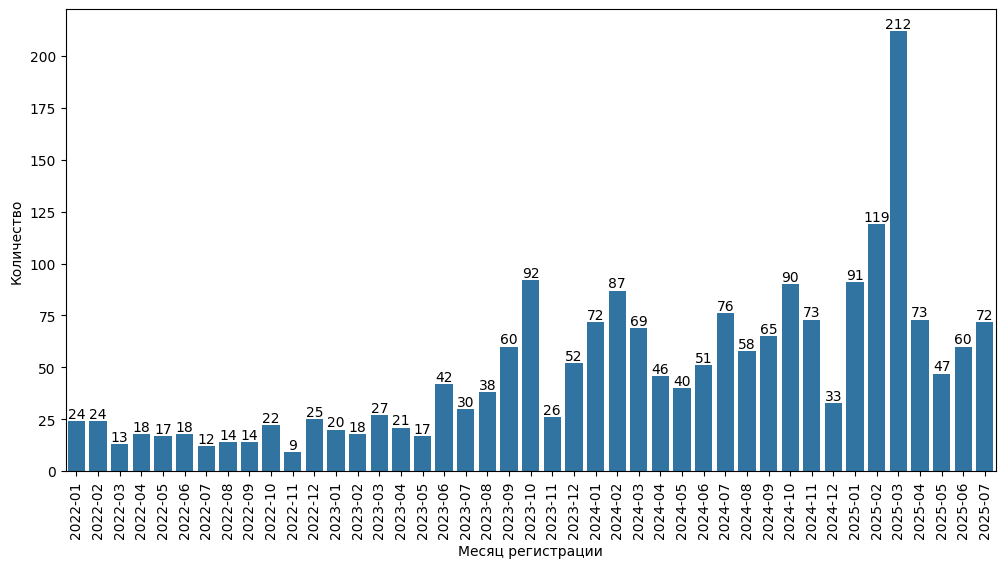

In [35]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Месяц регистрации')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylabel("Количество")
plt.xticks(rotation=90);

# Сохранение графика в файл
plt.savefig(f'Графики/{client}_{product}_по дате сообщения.png')

In [36]:
df_new = df.dropna(subset=['Дата изготовления изделия'])

df_new = df_new.sort_values(by='Дата изготовления изделия')
# df_new["Дата изготовления изделия"] = df_new["Дата изготовления изделия"].dt.strftime('%Y-%m')
df_new["Дата изготовления изделия"] = pd.to_datetime(df_new["Дата изготовления изделия"], errors='coerce').dt.strftime('%Y-%m')

In [37]:
df_new.shape

(1937, 8)

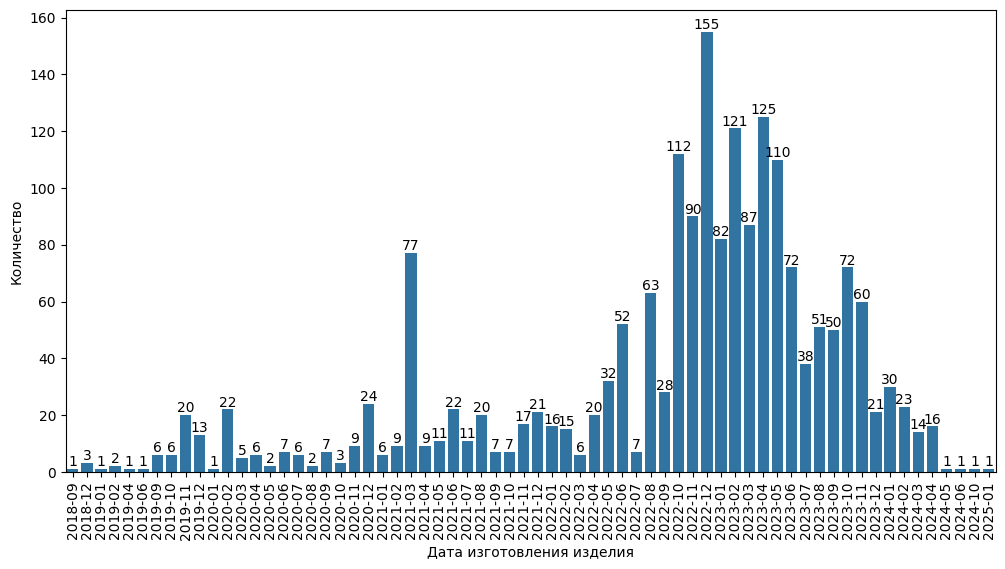

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_new, x=df_new['Дата изготовления изделия'].sort_values())
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylabel("Количество")
plt.xticks(rotation=90);

# Сохранение графика в файл
plt.savefig(f'Графики/{client}_{product}_по дате изготовления.png')

In [39]:
# df_24 = pd.concat([df5, df6])

In [40]:
# df_24 = df[['Месяц регистрации', 'Дата изготовления изделия']]

# из всего датафрейма оставляем два столбца: Месяц регистрации и Дата изготовления

In [41]:
df_24 = df.dropna(subset=['Дата изготовления изделия'])[['Месяц регистрации', 'Дата изготовления изделия']]

# удаляем из датафрейма строки с отсутствующей датой изготовления и оставляем два столбца: Месяц регистрации и Дата изготовления

In [42]:
# df_24['Месяц регистрации'] = df_24['Месяц регистрации'].dt.strftime('%Y-%m')

# операция выполнялась ранее (см. выше ячейку 87)

In [43]:
# df_24['Дата изготовления изделия'] = df_24['Дата изготовления изделия'].dt.strftime('%Y-%m').fillna('нет даты')

In [44]:
# df_24['Дата изготовления изделия'] = df_24['Дата изготовления изделия'].dt.strftime('%Y-%m')
df_24['Дата изготовления изделия'] = pd.to_datetime(df_24['Дата изготовления изделия'], errors='coerce').dt.strftime('%Y-%m')

In [45]:
df_24

,Месяц регистрации,Дата изготовления изделия
28,2022-01,2019-12
64,2022-01,2020-06
49,2022-01,2020-03
48,2022-01,2020-12
47,2022-01,2019-11
...,...,...
1100,2025-07,2022-12
1099,2025-07,2023-06
1097,2025-07,2023-11
1096,2025-07,2023-06


In [46]:
df_24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1937 entries, 28 to 1114
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Месяц регистрации          1937 non-null   object
 1   Дата изготовления изделия  1937 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [47]:
# Объединяем значения из обеих колонок
all_values = pd.concat([df_24['Месяц регистрации'], df_24['Дата изготовления изделия']]).unique()

# Сортируем значения
all_values_sorted = sorted(all_values)

In [48]:
# Преобразовываем данные в длинный формат:
df_melted = pd.melt(
    df_24,
    value_vars=['Месяц регистрации', 'Дата изготовления изделия'],
    var_name='variable',
    value_name='value'
)

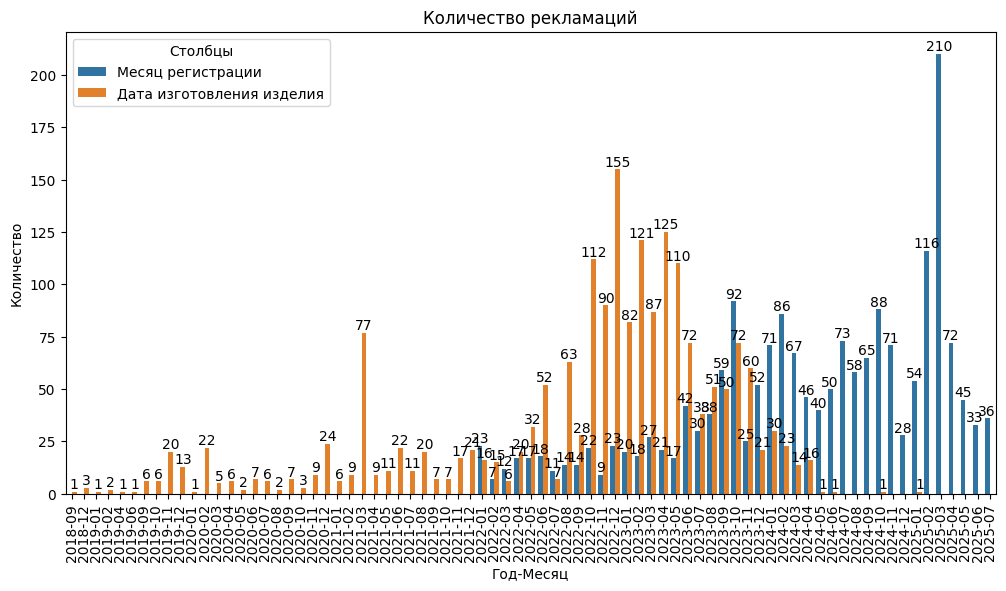

In [51]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_melted,
    x='value',
    hue='variable',
    order=all_values_sorted
)

plt.title('Количество рекламаций')
# plt.xlabel('Год - Месяц')
# plt.ylabel('Количество')
plt.legend(title='Столбцы')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.set_ylabel("Количество")
ax.set_xlabel("Год-Месяц")
plt.xticks(rotation=90);

# Сохранение графика в файл
plt.savefig(f'Графики/{client}_{product}_дата изготовления и сообщения.png')